## Lib imports

In [531]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import random
import statistics
# from math import pi
# from matplotlib.gridspec import GridSpec
# from dateutil.relativedelta import *
# import matplotlib.dates as mdates
# from matplotlib.dates import DateFormatter
import seaborn as sns
import scipy.stats
# from statsmodels.graphics.gofplots import qqplot
# import cv2
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
# from sklearn.model_selection import cross_val_score, cross_val_predict, RepeatedKFold 
# from sklearn.linear_model import LinearRegression, LogisticRegression
# from collections import Counter
# import copy
# from sklearn.model_selection import KFold
# from sklearn.model_selection import train_test_split
import sklearn.metrics as me
# from sklearn import linear_model
from sklearn.metrics import classification_report
import pingouin as pg
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## Files reading

In [532]:
!python3 '/Users/leosilva/development/thesis/workspacePyCharm/TwitterDataMining/main_generate_json_files.py' --all_tweets True

Starting script...
Removing existing file...
Ending script...


In [533]:
data = pd.read_json(r'/Users/leosilva/development/thesis/workspacePyCharm/TwitterDataMining/alldata.json')
data.head()

,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
id_str_twitter,23781146,15148309,927028057763995648,77648005,3429765093,10794662,1034514325644431361,529445600,12050562,62314491,18289937,172880784,18609547,2164986296,1026783544457273345,109604376,1040939562774790144,69734383,119897261
participant_id,1,2,3,None,4,5,6,None,7,8,None,9,10,11,12,13,14,15,16
name,Fe Rebelatto,Sommelier de Airbnb,✪ Felippe,Conference Distinguished Specialist,Paula Santana,Maharaja of the Legacies,Jessica,"var nickname = ""Riquettinha"";",Roberta Arcoverde,Gabriela,Thamara Andrade,felipe.ts ⚡,Juan Lopes,Rafael Dantas,iagor com i,T̷o̷m̷o̷y̷o̷ ̷ F̷u̷r̷a̷c̷ã̷o̷,Esdras Xavier,belle-🏴.dev || twitch.tv/bellesamways,Willian Justen
screen_name,rebelatto,Guilh_rm_,FelippeRegazio,NannoKa,psanrosa13,rponte,dev_jessi,Riquettinha,rla4,Gabrielathalita,thamyk,felipefialho_,juanplopes,RaffaelDantass,Iagor51,RafaelMansilha,esdras_xavieer,bellesamways,Willian_justen
location,"Rio de Janeiro, Brasil",somewhere in Brazil,,Ctba-PR Brasil,Brasil,"Ceará, Brazil",São Paulo - Brasil,"Belo Horizonte, Brasil","Sao Paulo, Brazil",Belo Horizonte,"Belo Horizonte, Brazil.",Dark Side of the Moon,"Rio de Janeiro, Brasil","São Paulo, Brasil",Pvh,"Palmas, Tocantins, Brasil","Jaraguá do Sul, Brasil",Curitiba,"Petrópolis, Brasil"


In [534]:
def create_tweets_df_per_user(data, id_user):

    tweets_pd = pd.DataFrame(data[id_user]['tweets'])
    tweets_pd.columns = ['id', 'id_str_twitter', "text", "created_at", 'favorite_count', 'retweet_count',
                         'lang',
                         "id_user", "vader_sentiment_analysis_score", "vader_sentiment_analysis_polarity",
                         "vader_sentiment_analysis_polarity_5_cat",
                         "oplexicon_sentiment_analysis_score", "oplexicon_sentiment_analysis_polarity",
                         "oplexicon_sentiment_analysis_polarity_5_cat",
                         "sentistrength_sentiment_analysis_score", "sentistrength_sentiment_analysis_polarity",
                         "sentistrength_sentiment_analysis_polarity_5_cat",
                         "sentilexpt_sentiment_analysis_score", "sentilexpt_sentiment_analysis_polarity",
                         "sentilexpt_sentiment_analysis_polarity_5_cat",
                         "liwc_sentiment_analysis_score", "liwc_sentiment_analysis_polarity",
                         "liwc_sentiment_analysis_polarity_5_cat",
                         "final_score", "final_score_ensemble", 
                         "final_polarity", "final_polarity_ensemble", 
                         'text_updated', 'is_retweet', 'retweet_updated']
 
    return tweets_pd

In [535]:
all_tweets = pd.DataFrame()
for c in data:
    id_user = c
    if data[id_user]['bigfive']:
        tweets = create_tweets_df_per_user(data, id_user)
        columns_to_delete = ['id', 'id_str_twitter', "text", 'favorite_count', 'retweet_count', 'lang',
                             #"vader_sentiment_analysis_score", 
                             "vader_sentiment_analysis_polarity",
                             "vader_sentiment_analysis_polarity_5_cat",
                             #"oplexicon_sentiment_analysis_score",
                             "oplexicon_sentiment_analysis_polarity",
                             "oplexicon_sentiment_analysis_polarity_5_cat",
                             #"sentistrength_sentiment_analysis_score",
                             "sentistrength_sentiment_analysis_polarity",
                             "sentistrength_sentiment_analysis_polarity_5_cat",
                             #"sentilexpt_sentiment_analysis_score",
                             "sentilexpt_sentiment_analysis_polarity",
                             "sentilexpt_sentiment_analysis_polarity_5_cat",
                             #"liwc_sentiment_analysis_score",
                             "liwc_sentiment_analysis_polarity",
                             "liwc_sentiment_analysis_polarity_5_cat",
                             'text_updated', 'is_retweet', 'retweet_updated']

        for c in columns_to_delete:
            del tweets[c]

        tweets['Participant'] = data[id_user]['participant_id']
        if all_tweets.empty:
            all_tweets = tweets
        else:
            all_tweets = all_tweets.append(tweets)

In [536]:
all_tweets.head()

,created_at,id_user,vader_sentiment_analysis_score,oplexicon_sentiment_analysis_score,sentistrength_sentiment_analysis_score,sentilexpt_sentiment_analysis_score,liwc_sentiment_analysis_score,final_score,final_score_ensemble,final_polarity,final_polarity_ensemble,Participant
0,2021-03-31T19:13:28,26,-0.4588,0.000000,0.00,0.00,0.0000,-0.091760,0.000,neg,neu,1
1,2021-03-31T12:28:56,26,0.0000,0.000000,0.00,0.00,-0.0667,-0.013340,0.000,neg,neu,1
2,2021-03-31T12:17:06,26,0.7734,0.458831,0.00,0.00,0.0196,0.250366,0.000,pos,neu,1
3,2021-03-31T11:46:04,26,-0.8720,0.458831,0.25,-0.25,0.0400,-0.074634,0.000,neg,neu,1
4,2021-03-30T17:58:24,26,-0.6808,0.000000,0.00,-0.25,0.0000,-0.186160,-0.125,neg,neg,1


In [537]:
count = 1
json_data = {
    'Participant': [],
    'Id User': [],
    'O': [],
    'C': [],
    'E': [],
    'A': [],
    'N': []
}

for d in data:
    if data[d]['bigfive']:
        b = pd.DataFrame(data[d]['bigfive'])
        b.columns = ['id', 'O', 'C', 'E', 'A', 'N', 'Id User']
        b['Participant'] = count
        del b['id']
        b = b[['Participant', 'Id User', 'O', 'C', 'E', 'A', 'N']]
        json_data['Participant'].append(b['Participant'][0])
        json_data['Id User'].append(b['Id User'][0])
        json_data['O'].append(b['O'][0])
        json_data['C'].append(b['C'][0])
        json_data['E'].append(b['E'][0])
        json_data['A'].append(b['A'][0])
        json_data['N'].append(b['N'][0])
        count += 1
        
bf = pd.DataFrame(json_data)

In [538]:
bf.head()

,Participant,Id User,O,C,E,A,N
0,1,26,37,43,36,24,26
1,2,27,41,43,34,22,23
2,3,28,43,46,31,24,15
3,4,30,17,33,33,22,39
4,5,31,22,33,31,20,8


In [539]:
df_dict = {'id_user' : [],
            'pos' : [],
            'neu' : [],
            'neg' : [],
            'por_pos' : [],
            'por_neu' : [],
            'por_neg' : [],
            'mean' : [],
            'O': [],
            'C': [],
            'E': [],
            'A': [],
            'N': []
          }

df_grouped = all_tweets.groupby(['Participant'])
for i in range(1,len(df_grouped)+1):
    t = all_tweets.query('Participant == {}'.format(i))
    bigfive = bf.query('Participant == {}'.format(i))
    vader_df = t[['final_score_ensemble', 'final_polarity_ensemble']].copy()
    qtd_pos = vader_df.query('final_polarity_ensemble == "pos"').count()
    qtd_neu = vader_df.query('final_polarity_ensemble == "neu"').count()
    qtd_neg = vader_df.query('final_polarity_ensemble == "neg"').count()
    qtd_total = vader_df['final_polarity_ensemble'].count()
    df_dict['id_user'].append(bigfive['Id User'].iloc[0])
#     print(type(bigfive['Id User'].iloc[0]))
    df_dict['pos'].append(qtd_pos.iloc[0])
    df_dict['neu'].append(qtd_neu.iloc[0])
    df_dict['neg'].append(qtd_neg.iloc[0])
    df_dict['por_pos'].append(((qtd_pos / qtd_total) * 100).iloc[0])
    df_dict['por_neu'].append(((qtd_neu / qtd_total) * 100).iloc[0])
    df_dict['por_neg'].append(((qtd_neg / qtd_total) * 100).iloc[0])
    df_dict['mean'].append(vader_df['final_score_ensemble'].mean())

    df_dict['O'].append(bigfive['O'].iloc[0])
    df_dict['C'].append(bigfive['C'].iloc[0])
    df_dict['E'].append(bigfive['E'].iloc[0])
    df_dict['A'].append(bigfive['A'].iloc[0])
    df_dict['N'].append(bigfive['N'].iloc[0])

df = pd.DataFrame(df_dict)

biglist = ['O', 'C', 'E', 'A', 'N']
for b in biglist:
    res = []
    for r in df[b]:
        if r <= 10:
            res.append(1)
        elif r > 10 and r < 21:
            res.append(2)
        elif r > 20 and r < 31:
            res.append(3)
        elif r > 30 and r < 41:
            res.append(4)
        elif r > 40:
            res.append(5)

    df['{}_Coded'.format(b)] = res
df

,id_user,pos,neu,neg,por_pos,por_neu,por_neg,mean,O,C,E,A,N,O_Coded,C_Coded,E_Coded,A_Coded,N_Coded
0,26,1408,1866,1764,27.947598,37.038507,35.013894,-0.022431,37,43,36,24,26,4,5,4,3,3
1,27,1367,1926,1255,30.057168,42.348285,27.594547,-0.000698,41,43,34,22,23,5,5,4,3,3
2,28,1968,2031,1933,33.175995,34.238031,32.585974,-0.007192,43,46,31,24,15,5,5,4,3,2
3,30,1719,832,620,54.210028,26.237780,19.552192,0.113446,17,33,33,22,39,2,4,4,3,4
4,31,2993,1443,1557,49.941599,24.078091,25.980310,0.055160,22,33,31,20,8,3,4,4,2,1
5,32,4386,2693,2306,46.734150,28.694726,24.571124,0.057806,39,49,39,28,15,4,5,4,3,2
6,34,693,459,393,44.854369,29.708738,25.436893,0.051225,35,35,32,26,16,4,4,4,3,2
7,35,895,975,725,34.489403,37.572254,27.938343,0.028354,29,45,34,35,29,3,5,4,4,3
8,37,3235,1892,1329,50.108426,29.306072,20.585502,0.066105,40,46,38,22,21,4,5,4,3,3
9,38,1646,1336,1726,34.961767,28.377230,36.661003,-0.017339,32,46,19,18,28,4,5,2,2,3


## CORRELATIONS

In [540]:
df_corr = df[['por_pos', 'por_neu', 'por_neg', 'O', 'C', 'E', 'A', 'N', 'O_Coded', 'C_Coded', 'E_Coded', 'A_Coded', 'N_Coded']]
df_corr.rcorr(method='spearman', upper='pval', decimals=4, padjust=None, stars=False)

,por_pos,por_neu,por_neg,O,C,E,A,N,O_Coded,C_Coded,E_Coded,A_Coded,N_Coded
por_pos,-,0.0000,0.0061,0.6461,0.3571,0.6275,0.2172,0.6009,0.5271,0.0091,0.5931,0.1507,0.8498
por_neu,-0.8971,-,0.1373,0.4577,0.3250,0.8237,0.0613,0.5895,0.4378,0.0091,0.9206,0.0104,0.7564
por_neg,-0.6529,0.3882,-,0.9219,0.2489,0.655,0.7932,0.5895,0.6875,0.0210,0.4814,0.4594,0.8633
O,-0.1244,0.2,0.0267,-,0.0136,0.2654,0.6096,0.0316,0.0000,0.0988,0.3406,0.6508,0.1175
C,-0.2467,0.263,0.3061,0.6018,-,0.193,0.3163,0.4431,0.0468,0.0001,0.6738,0.5072,0.5072
E,0.1315,0.0606,-0.1211,0.2961,0.3433,-,0.1796,0.5119,0.6077,0.2006,0.0001,0.3391,0.6415
A,-0.3264,0.4778,-0.0712,0.1383,0.2676,0.3532,-,0.5336,0.5530,0.5118,0.1764,0.0000,0.4891
N,-0.1416,0.146,0.146,-0.5379,-0.2064,-0.177,-0.1682,-,0.0089,0.8714,0.1406,0.9025,0.0000
O_Coded,-0.1708,0.2088,0.1091,0.9368,0.5034,0.139,0.1604,-0.6297,-,0.2115,0.5051,0.5671,0.0389
C_Coded,-0.6289,0.6289,0.5704,0.4273,0.8128,0.3379,0.1771,0.044,0.3303,-,0.7406,0.4125,1.


In [541]:
columns_features = ['O', 'C', 'E', 'A', 'N']
df_features = pd.DataFrame(df[columns_features])
df_features

,O,C,E,A,N
0,37,43,36,24,26
1,41,43,34,22,23
2,43,46,31,24,15
3,17,33,33,22,39
4,22,33,31,20,8
5,39,49,39,28,15
6,35,35,32,26,16
7,29,45,34,35,29
8,40,46,38,22,21
9,32,46,19,18,28


In [542]:
target = pd.DataFrame(df[['por_pos', 'por_neu', 'por_neg']])
target

,por_pos,por_neu,por_neg
0,27.947598,37.038507,35.013894
1,30.057168,42.348285,27.594547
2,33.175995,34.238031,32.585974
3,54.210028,26.237780,19.552192
4,49.941599,24.078091,25.980310
5,46.734150,28.694726,24.571124
6,44.854369,29.708738,25.436893
7,34.489403,37.572254,27.938343
8,50.108426,29.306072,20.585502
9,34.961767,28.377230,36.661003


In [543]:
combs = [] # lista que guarda a combinacao

def combinations(target,data):
    for i in range(len(data)):
        new_target = copy.copy(target)
        new_data = copy.copy(data)
        new_target.append(data[i])
        new_data = data[i+1:]
        combs.append(new_target)
        combinations(new_target, new_data)

tgt = []
features_list = ['O', 'C', 'E', 'A', 'N']

combinations(tgt, features_list)

In [544]:
# LINEAR REGRESSION -- WITHOUT -- CONSTANT VALUE

def perform_linear_regression(features, targets):
    for f in features:
        X = df_features[f]
        for t in targets:        
            y = target[t]
            X = sm.add_constant(X)

            # Note the difference in argument order
            model = sm.OLS(y, X).fit()
            predictions = model.predict(X) # make the predictions by the model
#             print(model.f_pvalue)
            # Print out the statistics
            if float(model.f_pvalue) <= 0.05:
                print(model.summary())
#                 with open('linear_regression_main_results_{}.txt'.format(t), 'a') as f:
#                     f.write(str(model.summary()))

In [545]:
targets = ['por_pos', 'por_neu', 'por_neg']

perform_linear_regression(combs, targets)

                            OLS Regression Results                            
Dep. Variable:                por_pos   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     5.183
Date:                Sun, 01 Aug 2021   Prob (F-statistic):             0.0390
Time:                        17:10:55   Log-Likelihood:                -57.242
No. Observations:                  16   AIC:                             118.5
Df Residuals:                      14   BIC:                             120.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.2211     18.889      4.247      0.0

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [546]:
# LINEAR REGRESSION -- WITH -- CONSTANT VALUE

X = df_features["O"]
y = target["por_pos"]
X = sm.add_constant(X)

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                por_pos   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     1.399
Date:                Sun, 01 Aug 2021   Prob (F-statistic):              0.257
Time:                        17:10:56   Log-Likelihood:                -59.000
No. Observations:                  16   AIC:                             122.0
Df Residuals:                      14   BIC:                             123.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.2347     12.688      4.117      0.001      25.021      79.449
O             -0.4530      0.383     -1.183      0.257      -1.274       0.368
==============================================================================
Omnibus:                        2.696   Durbin-Watson:                   1.276
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                1.097
Skew:                          -0.037   Prob(JB):                        0.578
Kurtosis:                       1.719   Cond. No.                         163.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [547]:
# LINEAR REGRESSION -- WITH -- CONSTANT VALUE

X = df_features["C"]
y = target["por_pos"]
X = sm.add_constant(X)

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                por_pos   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     5.183
Date:                Sun, 01 Aug 2021   Prob (F-statistic):             0.0390
Time:                        17:10:56   Log-Likelihood:                -57.242
No. Observations:                  16   AIC:                             118.5
Df Residuals:                      14   BIC:                             120.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.2211     18.889      4.247      0.001      39.708     120.734
C             -1.0284      0.452     -2.277      0.039      -1.997      -0.060
==============================================================================
Omnibus:                        1.004   Durbin-Watson:                   1.118
Prob(Omnibus):                  0.605   Jarque-Bera (JB):                0.723
Skew:                           0.483   Prob(JB):                        0.697
Kurtosis:                       2.612   Cond. No.                         341.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [548]:
# LINEAR REGRESSION -- WITHOUT -- CONSTANT VALUE

# MORE THAN ONE VARIABLE
X = df_features[["O", "C"]]
y = target["por_pos"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                por_pos   R-squared (uncentered):                   0.887
Model:                            OLS   Adj. R-squared (uncentered):              0.870
Method:                 Least Squares   F-statistic:                              54.70
Date:                Sun, 01 Aug 2021   Prob (F-statistic):                    2.42e-07
Time:                        17:10:56   Log-Likelihood:                         -63.862
No. Observations:                  16   AIC:                                      131.7
Df Residuals:                      14   BIC:                                      133.3
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
O             -0.0483      0.682     -0.071      0.945      -1.512       1.415
C              0.9134      0.541      1.689      0.113      -0.246       2.073
==============================================================================
Omnibus:                        3.198   Durbin-Watson:                   1.556
Prob(Omnibus):                  0.202   Jarque-Bera (JB):                1.510
Skew:                           0.412   Prob(JB):                        0.470
Kurtosis:                       1.741   Cond. No.                         13.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [549]:
# LINEAR REGRESSION -- WITH -- CONSTANT VALUE

# MORE THAN ONE VARIABLE
X = df_features[["O", "C"]]
y = target["por_pos"]
X = sm.add_constant(X)

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                por_pos   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     2.436
Date:                Sun, 01 Aug 2021   Prob (F-statistic):              0.126
Time:                        17:10:56   Log-Likelihood:                -57.215
No. Observations:                  16   AIC:                             120.4
Df Residuals:                      13   BIC:                             122.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.5330     19.626      4.103      0.001      38.133     122.933
O              0.0980      0.469      0.209      0.838      -0.915       1.111
C             -1.1125      0.617     -1.803      0.095      -2.446       0.221
==============================================================================
Omnibus:                        0.995   Durbin-Watson:                   1.104
Prob(Omnibus):                  0.608   Jarque-Bera (JB):                0.785
Skew:                           0.488   Prob(JB):                        0.675
Kurtosis:                       2.528   Cond. No.                         436.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [550]:
df

,id_user,pos,neu,neg,por_pos,por_neu,por_neg,mean,O,C,E,A,N,O_Coded,C_Coded,E_Coded,A_Coded,N_Coded
0,26,1408,1866,1764,27.947598,37.038507,35.013894,-0.022431,37,43,36,24,26,4,5,4,3,3
1,27,1367,1926,1255,30.057168,42.348285,27.594547,-0.000698,41,43,34,22,23,5,5,4,3,3
2,28,1968,2031,1933,33.175995,34.238031,32.585974,-0.007192,43,46,31,24,15,5,5,4,3,2
3,30,1719,832,620,54.210028,26.237780,19.552192,0.113446,17,33,33,22,39,2,4,4,3,4
4,31,2993,1443,1557,49.941599,24.078091,25.980310,0.055160,22,33,31,20,8,3,4,4,2,1
5,32,4386,2693,2306,46.734150,28.694726,24.571124,0.057806,39,49,39,28,15,4,5,4,3,2
6,34,693,459,393,44.854369,29.708738,25.436893,0.051225,35,35,32,26,16,4,4,4,3,2
7,35,895,975,725,34.489403,37.572254,27.938343,0.028354,29,45,34,35,29,3,5,4,4,3
8,37,3235,1892,1329,50.108426,29.306072,20.585502,0.066105,40,46,38,22,21,4,5,4,3,3
9,38,1646,1336,1726,34.961767,28.377230,36.661003,-0.017339,32,46,19,18,28,4,5,2,2,3


In [551]:
columns_features = ['O_Coded', 'C_Coded', 'E_Coded', 'A_Coded', 'N_Coded']
df_features = pd.DataFrame(df[columns_features])
df_features

,O_Coded,C_Coded,E_Coded,A_Coded,N_Coded
0,4,5,4,3,3
1,5,5,4,3,3
2,5,5,4,3,2
3,2,4,4,3,4
4,3,4,4,2,1
5,4,5,4,3,2
6,4,4,4,3,2
7,3,5,4,4,3
8,4,5,4,3,3
9,4,5,2,2,3


In [552]:
print(np.std(df_features['O_Coded']))
print(np.std(df_features['C_Coded']))
print(np.std(df_features['E_Coded']))
print(np.std(df_features['A_Coded']))
print(np.std(df_features['N_Coded']))

0.7806247497997998
0.46351240544347894
0.5994789404140899
0.6123724356957945
0.8569568250501305


In [553]:
combs = []
tgt = []
features_list = ['O_Coded', 'C_Coded', 'E_Coded', 'A_Coded', 'N_Coded']

combinations(tgt, features_list)

In [554]:
targets = ['por_pos', 'por_neu', 'por_neg']

perform_linear_regression(combs, targets)

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/s

                            OLS Regression Results                            
Dep. Variable:                por_pos   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     6.160
Date:                Sun, 01 Aug 2021   Prob (F-statistic):             0.0131
Time:                        17:10:56   Log-Likelihood:                -54.429
No. Observations:                  16   AIC:                             114.9
Df Residuals:                      13   BIC:                             117.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        109.0891     20.571      5.303      0.0

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                por_pos   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     13.27
Date:                Sun, 01 Aug 2021   Prob (F-statistic):            0.00266
Time:                        17:10:56   Log-Likelihood:                -54.429
No. Observations:                  16   AIC:                             112.9
Df Residuals:                      14   BIC:                             114.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        109.0489     19.728      5.528      0.0

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/s


                            OLS Regression Results                            
Dep. Variable:                por_neg   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     6.984
Date:                Sun, 01 Aug 2021   Prob (F-statistic):             0.0193
Time:                        17:10:56   Log-Likelihood:                -45.273
No. Observations:                  16   AIC:                             94.55
Df Residuals:                      14   BIC:                             96.09
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5312     11.132     -0.138      0.

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/s


                            OLS Regression Results                            
Dep. Variable:                por_neu   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     7.561
Date:                Sun, 01 Aug 2021   Prob (F-statistic):             0.0157
Time:                        17:10:56   Log-Likelihood:                -51.218
No. Observations:                  16   AIC:                             106.4
Df Residuals:                      14   BIC:                             108.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.3170      7.941      1.677      0.

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [555]:
df

,id_user,pos,neu,neg,por_pos,por_neu,por_neg,mean,O,C,E,A,N,O_Coded,C_Coded,E_Coded,A_Coded,N_Coded
0,26,1408,1866,1764,27.947598,37.038507,35.013894,-0.022431,37,43,36,24,26,4,5,4,3,3
1,27,1367,1926,1255,30.057168,42.348285,27.594547,-0.000698,41,43,34,22,23,5,5,4,3,3
2,28,1968,2031,1933,33.175995,34.238031,32.585974,-0.007192,43,46,31,24,15,5,5,4,3,2
3,30,1719,832,620,54.210028,26.237780,19.552192,0.113446,17,33,33,22,39,2,4,4,3,4
4,31,2993,1443,1557,49.941599,24.078091,25.980310,0.055160,22,33,31,20,8,3,4,4,2,1
5,32,4386,2693,2306,46.734150,28.694726,24.571124,0.057806,39,49,39,28,15,4,5,4,3,2
6,34,693,459,393,44.854369,29.708738,25.436893,0.051225,35,35,32,26,16,4,4,4,3,2
7,35,895,975,725,34.489403,37.572254,27.938343,0.028354,29,45,34,35,29,3,5,4,4,3
8,37,3235,1892,1329,50.108426,29.306072,20.585502,0.066105,40,46,38,22,21,4,5,4,3,3
9,38,1646,1336,1726,34.961767,28.377230,36.661003,-0.017339,32,46,19,18,28,4,5,2,2,3


In [556]:
#NORMALIZAR OS DADOS COM STANDARD SCALER PARA VER SE MELHORA O MODELO DE REGRESSAO E CORRELACAO

In [557]:
# scaler = MinMaxScaler()
# df_scaled = pd.DataFrame(scaler.fit_transform(df[['O', 'C', 'E', 'A', 'N', 'O_Coded', 'C_Coded', 'E_Coded', 'A_Coded', 'N_Coded']]))
# df_scaled.columns = ['O', 'C', 'E', 'A', 'N', 'O_Coded', 'C_Coded', 'E_Coded', 'A_Coded', 'N_Coded']
# # del df_scaled['id_user']
# # del df_scaled['mean']
# # del df_scaled['pos']
# # del df_scaled['neu']
# # del df_scaled['neg']
# # df_scaled = pd.concat([df[['por_neg', 'por_neu', 'por_pos']], df_scaled], axis=1)

# df_scaled

In [558]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df))
df_scaled.columns = ['id_user','pos', 'neu', 'neg', 'por_pos', 'por_neu', 'por_neg',
                     'mean', 'O', 'C', 'E', 'A', 'N', 'O_Coded', 'C_Coded', 'E_Coded', 'A_Coded', 'N_Coded']
del df_scaled['id_user']
del df_scaled['mean']
del df_scaled['pos']
del df_scaled['neu']
del df_scaled['neg']
df_scaled

,por_pos,por_neu,por_neg,O,C,E,A,N,O_Coded,C_Coded,E_Coded,A_Coded,N_Coded
0,-0.946439,0.315281,1.448544,0.676419,0.29277,0.929890,-0.172629,0.222636,0.480384,0.67420,0.625543,0.000000,0.145865
1,-0.738330,1.035239,-0.030029,1.269444,0.29277,0.548397,-0.597562,-0.145865,1.761410,0.67420,0.625543,0.000000,0.145865
2,-0.430657,-0.064438,0.964693,1.565956,0.87831,-0.023843,-0.172629,-1.128534,1.761410,0.67420,0.625543,0.000000,-1.021055
3,1.644351,-1.149200,-1.632759,-2.288706,-1.65903,0.357650,-0.597562,1.819474,-2.081666,-1.48324,0.625543,0.000000,1.312785
4,1.223270,-1.442034,-0.351724,-1.547424,-1.65903,-0.023843,-1.022494,-1.988370,-0.800641,-1.48324,0.625543,-1.632993,-2.187975
5,0.906855,-0.816060,-0.632556,0.972931,1.46385,1.502130,0.677236,-1.128534,0.480384,0.67420,0.625543,0.000000,-1.021055
6,0.721415,-0.678569,-0.460020,0.379907,-1.26867,0.166903,0.252304,-1.005701,0.480384,-1.48324,0.625543,0.000000,-1.021055
7,-0.301090,0.387653,0.038485,-0.509631,0.68313,0.548397,2.164501,0.591137,-0.800641,0.67420,0.625543,1.632993,0.145865
8,1.239728,-0.733167,-1.426835,1.121188,0.87831,1.311384,-0.597562,-0.391532,0.480384,0.67420,0.625543,0.000000,0.145865
9,-0.254491,-0.859110,1.776790,-0.064862,0.87831,-2.312804,-1.447427,0.468303,0.480384,0.67420,-2.710687,-1.632993,0.145865


In [559]:
df_scaled.rcorr(method='spearman', upper='pval', decimals=4, padjust=None, stars=True)

,por_pos,por_neu,por_neg,O,C,E,A,N,O_Coded,C_Coded,E_Coded,A_Coded,N_Coded
por_pos,-,***,**,,,,,,,**,,,
por_neu,-0.8971,-,,,,,,,,**,,*,
por_neg,-0.6529,0.3882,-,,,,,,,*,,,
O,-0.1244,0.2,0.0267,-,*,,,*,***,,,,
C,-0.2467,0.263,0.3061,0.6018,-,,,,*,***,,,
E,0.1315,0.0606,-0.1211,0.2961,0.3433,-,,,,,***,,
A,-0.3264,0.4778,-0.0712,0.1383,0.2676,0.3532,-,,,,,***,
N,-0.1416,0.146,0.146,-0.5379,-0.2064,-0.177,-0.1682,-,**,,,,***
O_Coded,-0.1708,0.2088,0.1091,0.9368,0.5034,0.139,0.1604,-0.6297,-,,,,*
C_Coded,-0.6289,0.6289,0.5704,0.4273,0.8128,0.3379,0.1771,0.044,0.3303,-,,,


In [560]:
df_scaled.rcorr(method='spearman', upper='pval', decimals=4, padjust=None, stars=False)

,por_pos,por_neu,por_neg,O,C,E,A,N,O_Coded,C_Coded,E_Coded,A_Coded,N_Coded
por_pos,-,0.0000,0.0061,0.6461,0.3571,0.6275,0.2172,0.6009,0.5271,0.0091,0.5931,0.1507,0.8498
por_neu,-0.8971,-,0.1373,0.4577,0.3250,0.8237,0.0613,0.5895,0.4378,0.0091,0.9206,0.0104,0.7564
por_neg,-0.6529,0.3882,-,0.9219,0.2489,0.655,0.7932,0.5895,0.6875,0.0210,0.4814,0.4594,0.8633
O,-0.1244,0.2,0.0267,-,0.0136,0.2654,0.6096,0.0316,0.0000,0.0988,0.3406,0.6508,0.1175
C,-0.2467,0.263,0.3061,0.6018,-,0.193,0.3163,0.4431,0.0468,0.0001,0.6738,0.5072,0.5072
E,0.1315,0.0606,-0.1211,0.2961,0.3433,-,0.1796,0.5119,0.6077,0.2006,0.0001,0.3391,0.6415
A,-0.3264,0.4778,-0.0712,0.1383,0.2676,0.3532,-,0.5336,0.5530,0.5118,0.1764,0.0000,0.4891
N,-0.1416,0.146,0.146,-0.5379,-0.2064,-0.177,-0.1682,-,0.0089,0.8714,0.1406,0.9025,0.0000
O_Coded,-0.1708,0.2088,0.1091,0.9368,0.5034,0.139,0.1604,-0.6297,-,0.2115,0.5051,0.5671,0.0389
C_Coded,-0.6289,0.6289,0.5704,0.4273,0.8128,0.3379,0.1771,0.044,0.3303,-,0.7406,0.4125,1.


In [561]:
df_corr = df[['por_neg', 'por_neu', 'por_pos', 'O_Coded', 'C_Coded', 'E_Coded', 'A_Coded', 'N_Coded']]
df_corr.rcorr(method='spearman', upper='pval', decimals=4, padjust=None, stars=False)

,por_neg,por_neu,por_pos,O_Coded,C_Coded,E_Coded,A_Coded,N_Coded
por_neg,-,0.1373,0.0061,0.6875,0.0210,0.4814,0.4594,0.8633
por_neu,0.3882,-,0.0000,0.4378,0.0091,0.9206,0.0104,0.7564
por_pos,-0.6529,-0.8971,-,0.5271,0.0091,0.5931,0.1507,0.8498
O_Coded,0.1091,0.2088,-0.1708,-,0.2115,0.5051,0.5671,0.0389
C_Coded,0.5704,0.6289,-0.6289,0.3303,-,0.7406,0.4125,1.
E_Coded,-0.1898,0.0271,0.1446,0.1798,0.0899,-,0.3078,0.1319
A_Coded,-0.1993,0.6199,-0.3764,0.1548,0.2202,0.2722,-,0.7954
N_Coded,0.0468,0.0843,-0.0515,-0.5202,0.0,-0.3932,-0.0705,-


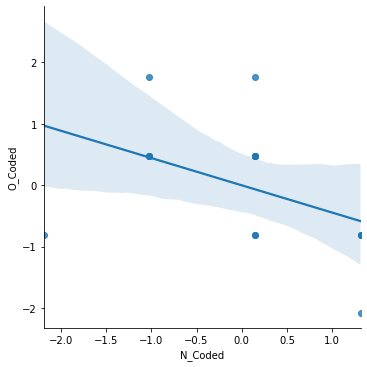

In [562]:
sns.lmplot(x="N_Coded", y="O_Coded", data=df_scaled)

In [563]:
# ocean = ['O', 'C', 'E', 'A', 'N']
# rate = 25

# for b in ocean:
#     scores = df[b]
#     scores = scores.sort_values()
#     last_index = int((rate * len(o_score))/100)
#     scores = scores.reset_index()
#     min_score = scores.iloc[last_index][b]
#     print(b, min_score)

#     df_scaled['{}_min'.format(b)] = np.where(df[b] <= min_score, 1, 0)

# df_scaled

In [564]:
# ocean = ['O', 'C', 'E', 'A', 'N']
# rate = 25

# for b in ocean:
#     scores = df[b]
#     scores = scores.sort_values()
#     last_index = int((rate * len(o_score))/100)
#     scores = scores.reset_index()
#     max_score = scores.iloc[len(scores) - last_index][b]
#     print(b, max_score)

#     df_scaled['{}_max'.format(b)] = np.where(df[b] >= max_score, 1, 0)

# df_scaled

In [565]:
# LINEAR REGRESSION -- WITH -- CONSTANT VALUE

# MORE THAN ONE VARIABLE
X = df_features[["A_Coded", "C_Coded", "E_Coded"]]
y = target["por_pos"]
X = sm.add_constant(X)

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                por_pos   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     5.441
Date:                Sun, 01 Aug 2021   Prob (F-statistic):             0.0135
Time:                        17:10:57   Log-Likelihood:                -52.892
No. Observations:                  16   AIC:                             113.8
Df Residuals:                      12   BIC:                             116.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        101.8311     22.308      4.565      0.001      53.227     150.435
A_Coded       -4.5841      3.394     -1.351      0.202     -11.980       2.812
C_Coded      -14.0763      4.218     -3.337      0.006     -23.267      -4.886
E_Coded        4.2608      3.384      1.259      0.232      -3.112      11.633
==============================================================================
Omnibus:                        3.490   Durbin-Watson:                   1.610
Prob(Omnibus):                  0.175   Jarque-Bera (JB):                2.225
Skew:                           0.912   Prob(JB):                        0.329
Kurtosis:                       2.896   Cond. No.                         80.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [566]:
pg.normality(df_scaled)

,W,pval,normal
por_pos,0.920844,0.174042,True
por_neu,0.941621,0.369352,True
por_neg,0.958814,0.640326,True
O,0.949463,0.481235,True
C,0.868218,0.025544,False
E,0.959798,0.658121,True
A,0.921497,0.178298,True
N,0.981805,0.976258,True
O_Coded,0.878056,0.036196,False
C_Coded,0.590884,0.000013,False


In [567]:
c = 5 # here c can take any value between 0 to 5
df_scaled['O_Coded'] = df_scaled['O_Coded'].apply(lambda x: x**c)
df_scaled['C_Coded'] = df_scaled['C_Coded'].apply(lambda x: x**c)
df_scaled['E_Coded'] = df_scaled['E_Coded'].apply(lambda x: x**c)
df_scaled['A_Coded'] = df_scaled['A_Coded'].apply(lambda x: x**c)
df_scaled['N_Coded'] = df_scaled['N_Coded'].apply(lambda x: x**c)

In [568]:
pg.normality(df_scaled)

,W,pval,normal
por_pos,0.920844,1.740423e-01,True
por_neu,0.941621,3.693516e-01,True
por_neg,0.958814,6.403264e-01,True
O,0.949463,4.812355e-01,True
C,0.868218,2.554361e-02,False
E,0.959798,6.581209e-01,True
A,0.921497,1.782984e-01,True
N,0.981805,9.762579e-01,True
O_Coded,0.559946,6.943774e-06,False
C_Coded,0.590884,1.329638e-05,False


<AxesSubplot:>

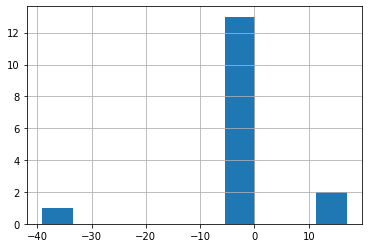

In [569]:
df_scaled['O_Coded'].hist()

In [570]:
from sklearn.preprocessing import power_transform

df_scaled['O_Coded'] = power_transform(df_scaled[['O_Coded']], method='yeo-johnson')

<AxesSubplot:>

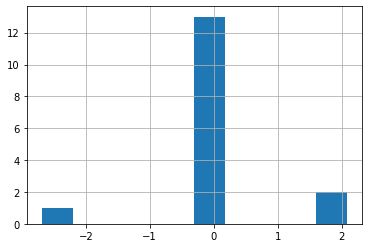

In [571]:
df_scaled['O_Coded'].hist()

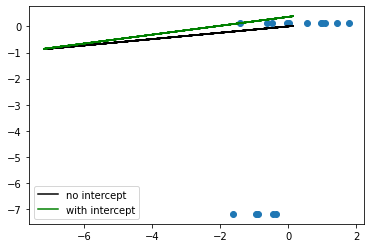

In [572]:
from sklearn.linear_model import LinearRegression

ind_var = 'C_Coded'

X = df_scaled[[ind_var]]
y = df_scaled["por_neg"]

# print(X)
# print(y)

plt.scatter(y,X[ind_var])
lr = LinearRegression(fit_intercept=False)

plt.plot(X[[ind_var]],lr.fit(X[[ind_var]], y).predict(X[[ind_var]]),color="k")

lr = LinearRegression()
plt.plot(X[[ind_var]],lr.fit(X[[ind_var]], y).predict(X[[ind_var]]),color="g")

plt.legend(['no intercept','with intercept'])

In [573]:
df_scaled

,por_pos,por_neu,por_neg,O,C,E,A,N,O_Coded,C_Coded,E_Coded,A_Coded,N_Coded
0,-0.946439,0.315281,1.448544,0.676419,0.29277,0.929890,-0.172629,0.222636,-0.097839,0.139297,0.095783,0.000000,0.000066
1,-0.738330,1.035239,-0.030029,1.269444,0.29277,0.548397,-0.597562,-0.145865,2.077731,0.139297,0.095783,0.000000,0.000066
2,-0.430657,-0.064438,0.964693,1.565956,0.87831,-0.023843,-0.172629,-1.128534,2.077731,0.139297,0.095783,0.000000,-1.109802
3,1.644351,-1.149200,-1.632759,-2.288706,-1.65903,0.357650,-0.597562,1.819474,-2.682448,-7.178880,0.095783,0.000000,3.899132
4,1.223270,-1.442034,-0.351724,-1.547424,-1.65903,-0.023843,-1.022494,-1.988370,-0.131357,-7.178880,0.095783,-11.612396,-50.143154
5,0.906855,-0.816060,-0.632556,0.972931,1.46385,1.502130,0.677236,-1.128534,-0.097839,0.139297,0.095783,0.000000,-1.109802
6,0.721415,-0.678569,-0.460020,0.379907,-1.26867,0.166903,0.252304,-1.005701,-0.097839,-7.178880,0.095783,0.000000,-1.109802
7,-0.301090,0.387653,0.038485,-0.509631,0.68313,0.548397,2.164501,0.591137,-0.131357,0.139297,0.095783,11.612396,0.000066
8,1.239728,-0.733167,-1.426835,1.121188,0.87831,1.311384,-0.597562,-0.391532,-0.097839,0.139297,0.095783,0.000000,0.000066
9,-0.254491,-0.859110,1.776790,-0.064862,0.87831,-2.312804,-1.447427,0.468303,-0.097839,0.139297,-146.351498,-11.612396,0.000066


In [574]:
pg.normality(df_scaled)

,W,pval,normal
por_pos,0.920844,1.740423e-01,True
por_neu,0.941621,3.693516e-01,True
por_neg,0.958814,6.403264e-01,True
O,0.949463,4.812355e-01,True
C,0.868218,2.554361e-02,False
E,0.959798,6.581209e-01,True
A,0.921497,1.782984e-01,True
N,0.981805,9.762579e-01,True
O_Coded,0.623951,2.748299e-05,False
C_Coded,0.590884,1.329638e-05,False
